<a href="https://colab.research.google.com/github/notGAYathri/Python-codes/blob/main/Logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
count = len(dataset)
print(count)


891


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

In [13]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)

In [14]:
dataset.shape

(891, 10)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [16]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.602694
std,257.353842,0.486592,0.836071,13.019697,49.693429,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

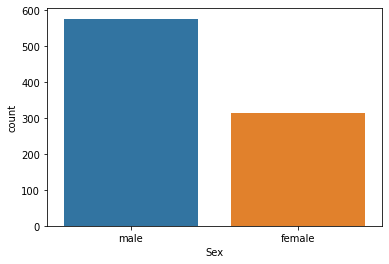

In [17]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


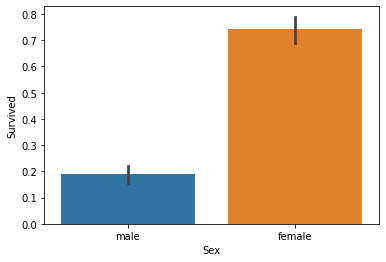

In [18]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

Conclusion: The number of female who survived was much more than the males who survived.
74% of the females survived and on the other hand only 18% of the males survived


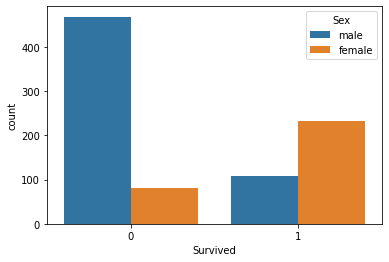

In [19]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

Conclusion: It is clear from the above graph that among the passengers who did not survive, most
of them were males. And among the passengers who survived, most of them were females.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

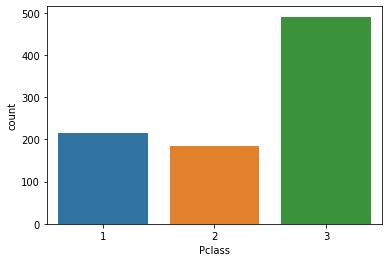

In [20]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

Conclusion: Number of passengers belonging to 3rd class is 491 which is maximum, number of
people belonging to 1st class is 216 which is second highest, and the number of people belonging
to 2nd class is 184 which is the minimum.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


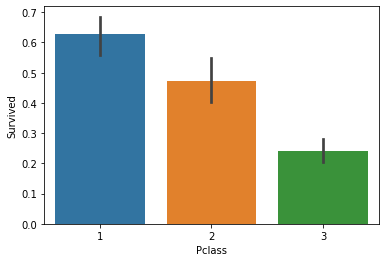

In [21]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

Conclusion: The survival rate of the passengers belonging to 1st class is more i.e. 62.96% and the
survival rate of the passengers belonging to 3rd class is least i.e. 24.23%.

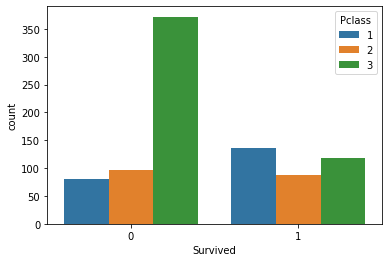

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

Conclusion: It is clear from the above graph that among the passengers who did not survive, most
of them belong to 3rd class. And among the passengers who survived, most of them belong to 1st
class.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    646
C    168
Q     77
Name: Embarked, dtype: int64

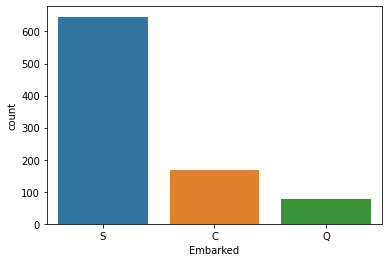

In [23]:
sns.countplot('Embarked',data=dataset)
dataset['Embarked'].value_counts()

Conclusion: Number of passengers traveling from Southampton port is 646 which is the maximum,
number of passengers traveling from Cherbourg port is 168, and the number of people traveling
from Queenstown is 77 which is the minimum.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


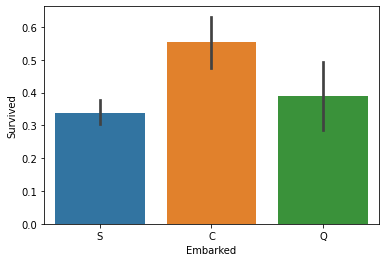

In [25]:
sns.barplot(x='Embarked',y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

Conclusion: passengers that embarked from port Cherbourg had a higher rate of Survival at
55.35%.

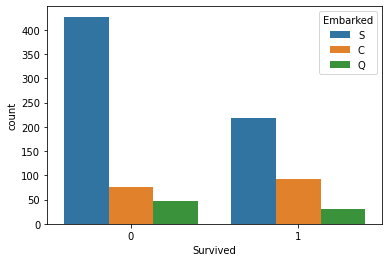

In [26]:
sns.countplot(x='Survived', hue='Embarked', data=dataset)

Conclusion: It is clear from the above graph that among the passengers who did not survive, most
of them embarked from Southampton. And among the passengers who survived, most of them 
embarked from Southampton.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    537
0    354
Name: TravelAlone, dtype: int64

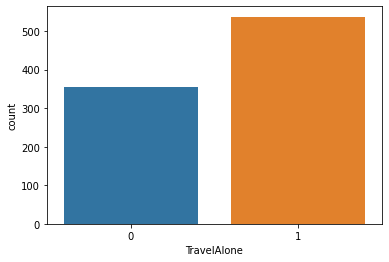

In [27]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()

Conclusion: 354 passengers were traveling alone and 537 passengers were not traveling alone.

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


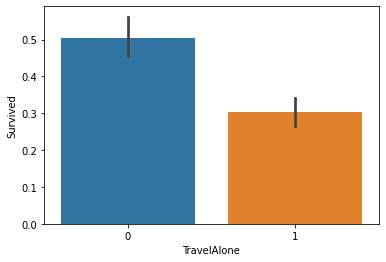

In [28]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

Conclusion: Passengers travelling alone were more likely to survive.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

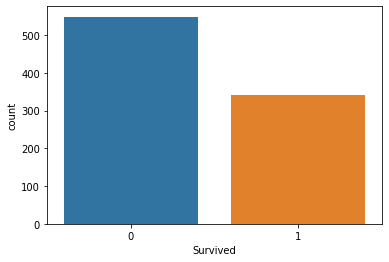

In [29]:
sns.countplot('Survived',data=dataset)
dataset['Survived'].value_counts()

Conclusion: For the given dataset 549 passengers did not survive and 342 passengers survived.

In [32]:
#Import label encoder

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,2,1


In [33]:
X = dataset.drop('Survived', 1)
y = dataset.Survived

<ipython-input-33-81b5ff03a075>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Survived', 1)


In [35]:
#Splitting the dataset
from sklearn.model_selection import train_test_split 
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)


In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

ValueError: ignored

In [40]:
y_pred = lr_model.predict(X_test)
y_pred

NameError: ignored